# Try 12.4.1: Multilayer perceptron models in Python.

* **Click the double-right arrowto restart the kernel and run all cells.**
* **Examine the code below.**
* **Change the parameter value of hidden_layer_sizes for the mlpReg_train model from [1] to [3,2]. Explore any changes in the output.**

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Loads the homes.csv dataset
homes = pd.read_csv('homes.csv')
homes

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,1,Sold,0,Harris,0,1,0,0,0
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,0,Sold,0,Parker,0,0,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,2,Active,1,Parker,0,0,0,0,1


In [4]:
# Loads input and output features
X = homes[['Bed', 'Floor']]
y = homes[['Price']]

In [5]:
# Splits the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), random_state=123)

In [6]:
# Initializes and trains a multilayer perceptron regressor model on the training set
# This cell takes a long time to run.
mlpReg_train = MLPRegressor(
    random_state=1, max_iter=500000, hidden_layer_sizes=[1]
).fit(X_train, np.ravel(y_train))

In [7]:
input_data = pd.DataFrame([[5, 2896]], columns=['Bed', 'Floor'])
prediction = mlpReg_train.predict(input_data)

In [8]:
prediction

array([285.60540111])

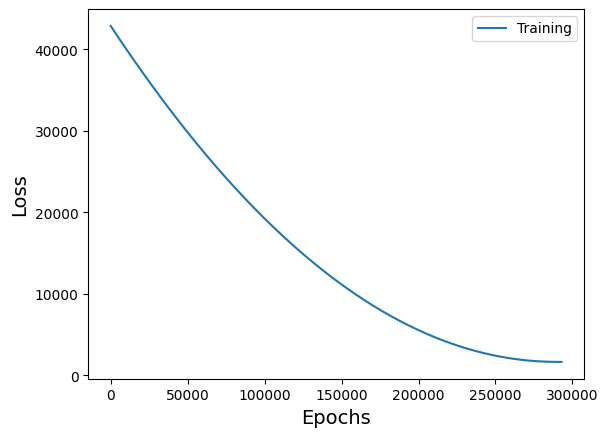

In [9]:
# Plots the loss curves for the training sets
f, ax = plt.subplots(1, 1)
sns.lineplot(
    x=range(len(mlpReg_train.loss_curve_)), y=mlpReg_train.loss_curve_, label='Training'
)
ax.set_xlabel('Epochs', fontsize=14);
ax.set_ylabel('Loss', fontsize=14);

In [10]:
# Compare the final loss between train and test sets
print(mlpReg_train.loss_)
print(
    mean_squared_error(y_test, mlpReg_train.predict(X_test)) / 2
)  # division by 2 to get squared error to match squared error.

1631.1136892023274
2291.1337337033756


In [11]:
# Obtains the final weights and biases
print(mlpReg_train.coefs_)
print(mlpReg_train.intercepts_)

[array([[1.22173285e-315],
       [2.40795145e-316]]), array([[6.9239093e-316]])]
[array([-1.41389006]), array([285.60540111])]


## challenge activity 12.4.2: Multilayer perceptron using scikit-learn.

## 1) This dataset contains information on taxi journeys during March 2019 in New York City. The data includes tip, number of passengers, and toll cost.

* **Initialize and fit the multilayer perceptron model, mlPercModel, on:**
     * **the training set.**
     * **the validation set.**
**The initialization parameters for both the training and validation sets are random state set to rng, a maximum of 9000 epochs, and a hidden layer size of [1, 2]. The np.ravel() function is used to get the y data to a usable format.**

**The code contains all imports, loads the dataset, splits the dataset into test and train data, and prints a predicted value and the weights, biases, and loss of the fitted multilayer perceptron model.**

In [ ]:
# Loads necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [ ]:


# Seed random number generator
rng = np.random.RandomState(15)

# Loads the taxisNY.csv dataset
taxisNY = pd.read_csv('taxisNY.csv')

# Loads predictor and target variables
X = taxisNY[['passengers','toll']].to_numpy() # converted to numpy type array
y = taxisNY[['tip']]

# Splits the data into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, np.ravel(y),random_state=rng)

# Initializes and trains a multilayer perceptron regressor model on the training and validation sets

mlPercModelTrain = # Your code goes here
mlPercModelValidation = # Your code goes here

# Predicts the tip of a taxi ride with a specific number of passengers and toll cost
print(mlPercModelTrain.predict([[4, 28]]))

# Prints the final weights, biases, and losses
weights = mlPercModelTrain.coefs_
biases = mlPercModelTrain.intercepts_
loss = mlPercModelTrain.loss_
print('{}\n{}\n{}'.format(weights, biases, loss))

## 2) This dataset contains information on taxi journeys during March 2019 in New York City. The data includes toll cost, total cost, and fare.

* **Predict the toll cost for a taxi ride with a total cost of 20 dollars and a fare of 10 dollars for the multilayer perceptron model, mlpModel.**

  
**The code contains all imports, loads the dataset, splits the dataset into test and train data, initializes and fits the model, and prints a predicted value and the weights, biases, and loss of the fitted multilayer perceptron model.**

In [ ]:
# Loads necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Seed random number generator
rng = np.random.RandomState(11)

# Loads the taxicabsNY.csv dataset
taxicabsNY = pd.read_csv('taxicabsNY.csv')

# Loads predictor and target variables
X = taxicabsNY[['tip','toll']].to_numpy() # converted to numpy type array
y = taxicabsNY[['passengers']]

# Splits the data into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, np.ravel(y),random_state=rng)

# Initializes and trains a multilayer perceptron regressor model on the training and validation sets
multLayerPercModelTrain = MLPRegressor(random_state=rng, max_iter=6000, hidden_layer_sizes=[1]).fit(XTrain, np.ravel(yTrain))
multLayerPercModelValidation = MLPRegressor(random_state=rng, max_iter=6000, hidden_layer_sizes=[1]).fit(XTest, np.ravel(yTest))

# Predicts the number of passengers of a taxi ride with a specific tip and toll cost
predVal = # Your code goes here
print(predVal)

# Prints the final weights, biases, and losses
weights = multLayerPercModelTrain.coefs_
biases = multLayerPercModelTrain.intercepts_
loss = multLayerPercModelTrain.loss_
print('{}\n{}\n{}'.format(weights, biases, loss))

## 3) This dataset contains information on taxi journeys during March 2019 in New York City. The data includes distance, fare, and tip.

* **For the multilayer perceptron model, multLayerPercModel, use the training set to calculate the final value of:**
    * **weights with relevant attribute coefs_.**
    * **biases with relevant attribute intercepts_.**
    * **loss with relevant attribute loss_.**
      
**The code contains all imports, loads the dataset, splits the dataset into test and train data, initializes and fits the model, prints a predicted value, and prints the weights, biases, and loss of the fitted multilayer perceptron model.**

In [ ]:
# Loads necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Seed random number generator
rng = np.random.RandomState(49)

# Loads the taxicabsNY.csv dataset
taxicabsNY = pd.read_csv('taxicabsNY.csv')

# Loads predictor and target variables
X = taxicabsNY[['fare','tip']].to_numpy() # converted to numpy type array
y = taxicabsNY[['distance']]

# Splits the data into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, np.ravel(y),random_state=rng)

# Initializes and trains a multilayer perceptron regressor model on the training and validation sets
multLayerPercModelTrain = MLPRegressor(random_state=rng, max_iter=10000, hidden_layer_sizes=[2]).fit(XTrain, np.ravel(yTrain))
multLayerPercModelValidation = MLPRegressor(random_state=rng, max_iter=10000, hidden_layer_sizes=[2]).fit(XTest, np.ravel(yTest))

# Predicts the distance of a taxi ride with a specific fare and tip
print(multLayerPercModelTrain.predict([[31, 1]]))

# Prints the final weights, biases, and losses

weights = # Your code goes here
biases = # Your code goes here
loss = # Your code goes here

print('{}\n{}\n{}'.format(weights, biases, loss))

## Solutions:

### 1) 
mlpModelTrain = MLPRegressor(random_state=rng, max_iter=8000, hidden_layer_sizes=[3, 1]).fit(XTrain, np.ravel(yTrain))
mlpModelValidation = MLPRegressor(random_state=rng, max_iter=8000, hidden_layer_sizes=[3, 1]).fit(XTest, np.ravel(yTest))

## 2)

multLayerPercModelTrain.predict([[1, 7]])

## 3)